## Project Summary -

Objective: The objective of this project is to develop a  model that accurately predicts the energy consumption of household appliances based on various input features. The model aims to provide insights into energy usage patterns and facilitate energy efficiency improvements in residential settings.

Data: The project utilizes a dataset that contains information on household appliance energy consumption along with several relevant input features. The dataset includes variables such as temperature, humidity, time of day, and various appliance power readings. The data is collected over a specific time period and is representative of real-world residential energy usage scenarios.

T1: Temperature in kitchen area, in Celsius

RH_1: Humidity in kitchen area, in %

T2: Temperature in living room area, in Celsius

RH_2:Humidity in living room area, in %

T3:Temperature in laundry room area

RH_3:Humidity in laundry room area, in %

T4:Temperature in office room, in Celsius

RH_4:Humidity in office room, in %

T5:Temperature in bathroom, in Celsius

RH_5:Humidity in bathroom, in %

T6:Temperature outside the building (north side), in Celsius

RH_6:Humidity outside the building (north side), in %

T7:Temperature in ironing room , in Celsius

RH_7:Humidity in ironing room, in %

T8:Temperature in teenager room 2, in Celsius

RH_8:Humidity in teenager room 2, in %

T9:Temperature in parents room, in Celsius

RH_9:Humidity in parents room, in %

T_out:Temperature outside (from Chièvres weather station), in Celsius

Press_mm_hg: (from Chièvres weather station), in mm Hg

RH_out: Humidity outside (from Chièvres weather station), in %

Windspeed: (from Chièvres weather station), in m/s

Visibility: (from Chièvres weather station), in km

Tdewpoint: (from Chièvres weather station), °C

rv1: Random variable 1, nondimensional

rv2: Rnadom variable 2, nondimensional

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

plt.style.use('ggplot')
sns.set()

In [3]:

# To display all the columns in Dataframe
pd.set_option('display.max_columns', None)

# Import and Ignore warnings for better code readability,
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'KAG_energydata_complete.csv')


In [6]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [10]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [14]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
# Checking Unique Values count for each variable.

for i in df.columns.tolist():
  print("The unique values in",i, "is",df[i].nunique(),".")

The unique values in date is 19735 .
The unique values in Appliances is 92 .
The unique values in lights is 8 .
The unique values in T1 is 722 .
The unique values in RH_1 is 2547 .
The unique values in T2 is 1650 .
The unique values in RH_2 is 3376 .
The unique values in T3 is 1426 .
The unique values in RH_3 is 2618 .
The unique values in T4 is 1390 .
The unique values in RH_4 is 2987 .
The unique values in T5 is 2263 .
The unique values in RH_5 is 7571 .
The unique values in T6 is 4446 .
The unique values in RH_6 is 9709 .
The unique values in T7 is 1955 .
The unique values in RH_7 is 5891 .
The unique values in T8 is 2228 .
The unique values in RH_8 is 6649 .
The unique values in T9 is 924 .
The unique values in RH_9 is 3388 .
The unique values in T_out is 1730 .
The unique values in Press_mm_hg is 2189 .
The unique values in RH_out is 566 .
The unique values in Windspeed is 189 .
The unique values in Visibility is 413 .
The unique values in Tdewpoint is 1409 .
The unique values in 

## Visualization of the distribution of the target variable 

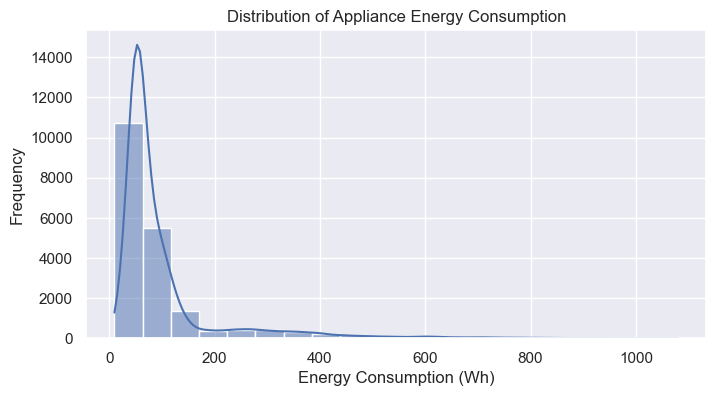

In [22]:

plt.figure(figsize=(8, 4))
sns.histplot(df['Appliances'], bins=20, kde=True)
plt.title('Distribution of Appliance Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()

## Insight

**Right-skewed:** There is a concentration of lower energy consumption values with a tail towards higher values. This is common in energy consumption data as many appliances consume relatively little energy, while a few consume much more.

### Temperature vs. Energy Consumption

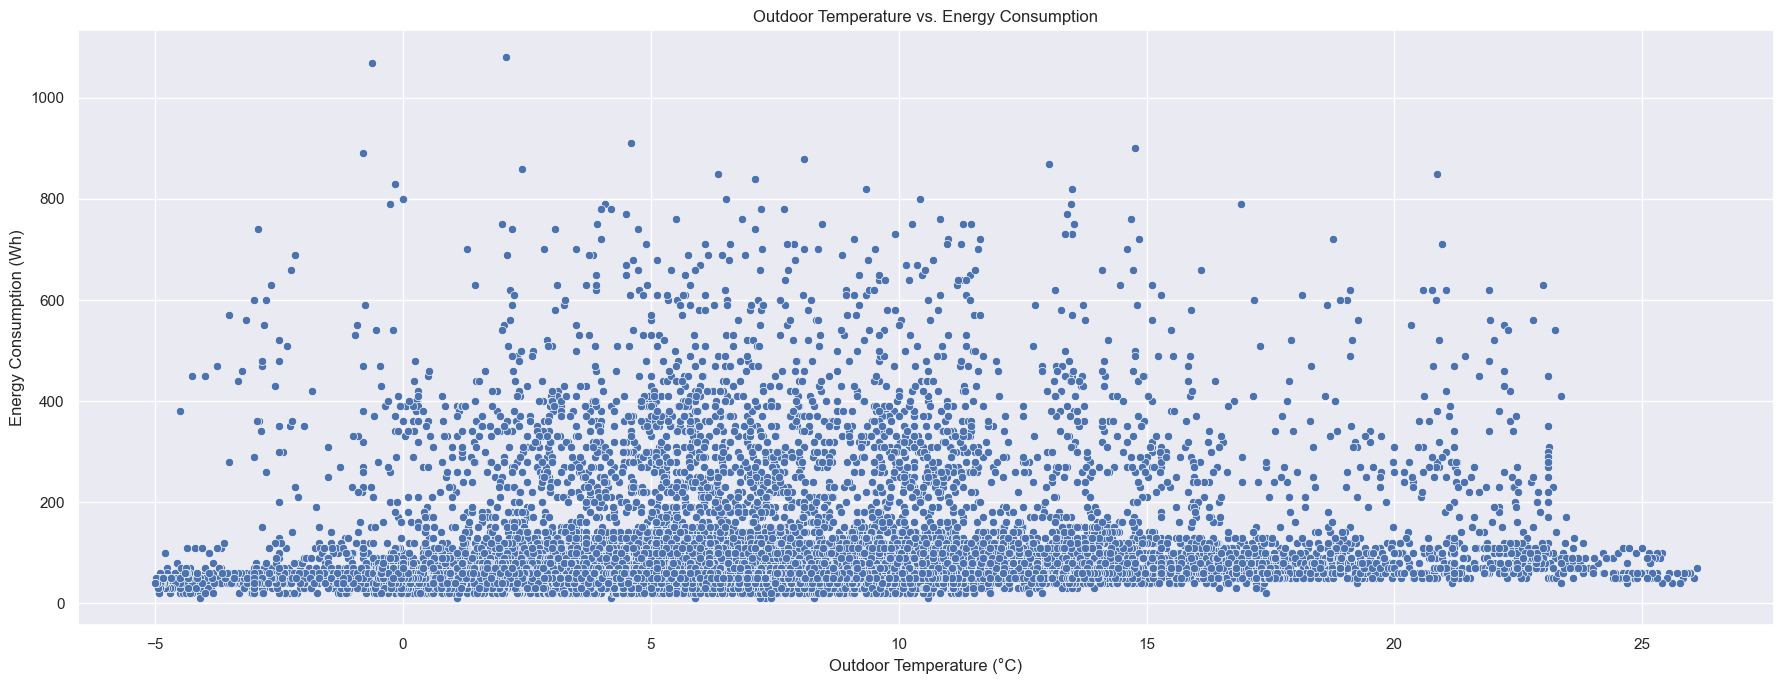

In [8]:
plt.figure(figsize=(18, 7))

sns.scatterplot(x='T_out', y='Appliances', data=df)
plt.title('Outdoor Temperature vs. Energy Consumption')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Energy Consumption (Wh)')
plt.tight_layout()
plt.show()

## Insights

1. Energy Consumption Range: The energy consumption values (Appliances) are predominantly within a certain range, likely indicating typical energy usage patterns within the given dataset.
2. Variability in Energy Consumption: While the majority of data points fall within the clustered range, there are still variations in energy consumption observed across different outdoor temperatures. This suggests that other factors besides outdoor temperature may influence energy consumption.
3. Clustered Distribution: The majority of data points seem to be clustered within a specific range of outdoor temperature and energy consumption. Most of the points are concentrated within the range of outdoor temperature from approximately 1°C to 12°C. Which suggest high energy usage within this periods.


## Humidity vs. Energy Consumption

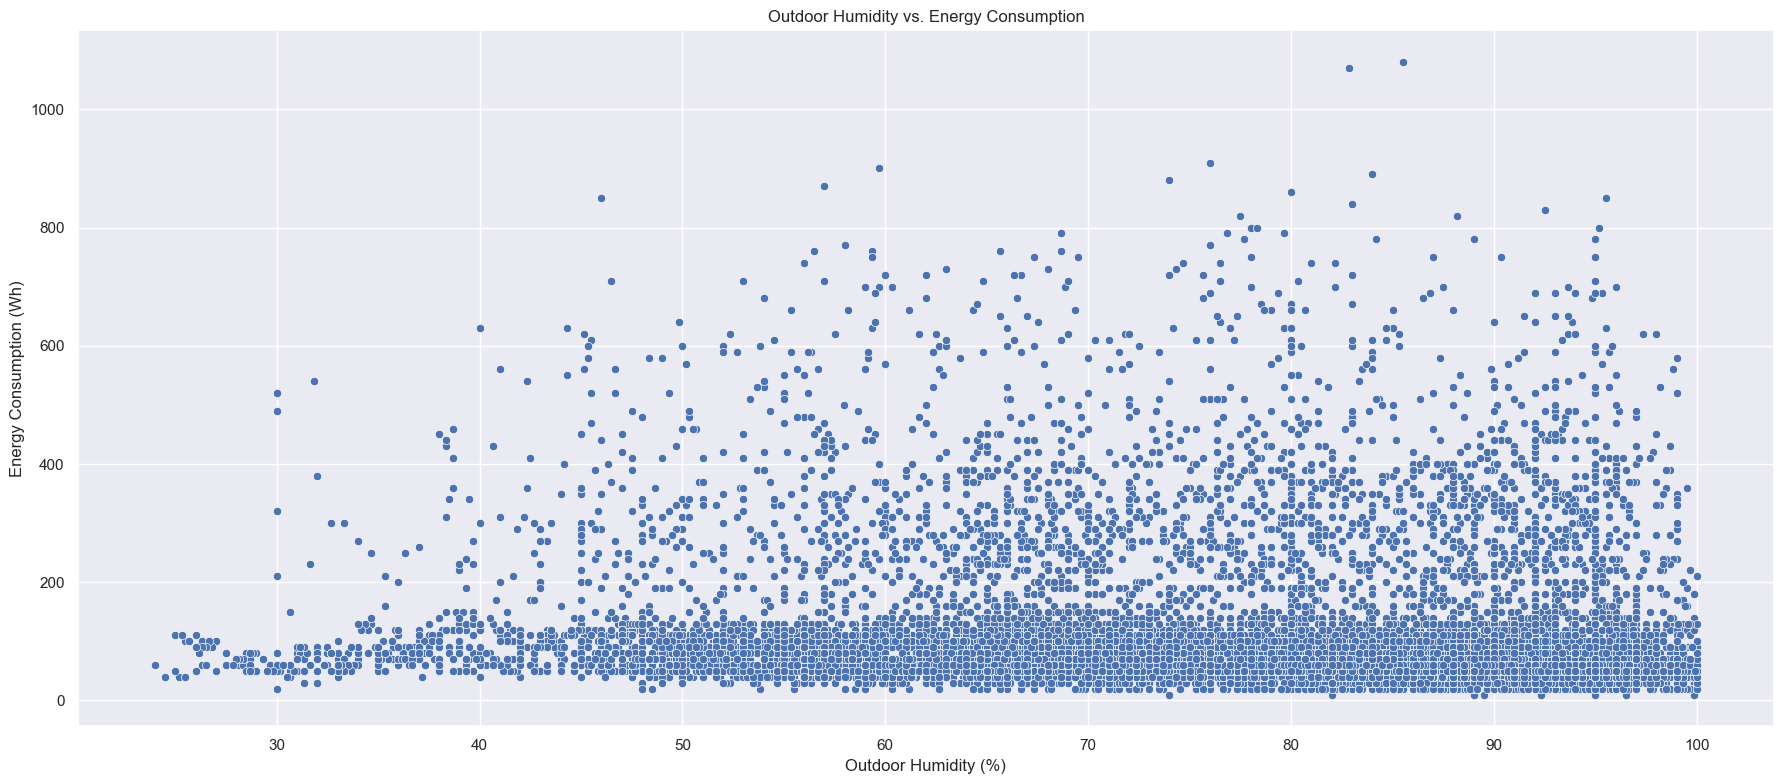

In [40]:
plt.figure(figsize=(18, 8))

sns.scatterplot(x='RH_out', y='Appliances', data=df)
plt.title('Outdoor Humidity vs. Energy Consumption')
plt.xlabel('Outdoor Humidity (%)')
plt.ylabel('Energy Consumption (Wh)')

plt.tight_layout()
plt.show()

## Insights

1. Clustered Energy Consumption: The majority of energy consumption values appear to be clustered within a certain range, predominantly between 0 and 200 Wh. This suggests that there may be typical energy usage patterns within the dataset.
2. Relationship with Outdoor Humidity: There is a trend indicating an increase in energy consumption with higher outdoor humidity levels. As outdoor humidity increases, there seems to be a tendency for energy consumptions to rise.

## Indoor Temperature vs. Energy Consumption

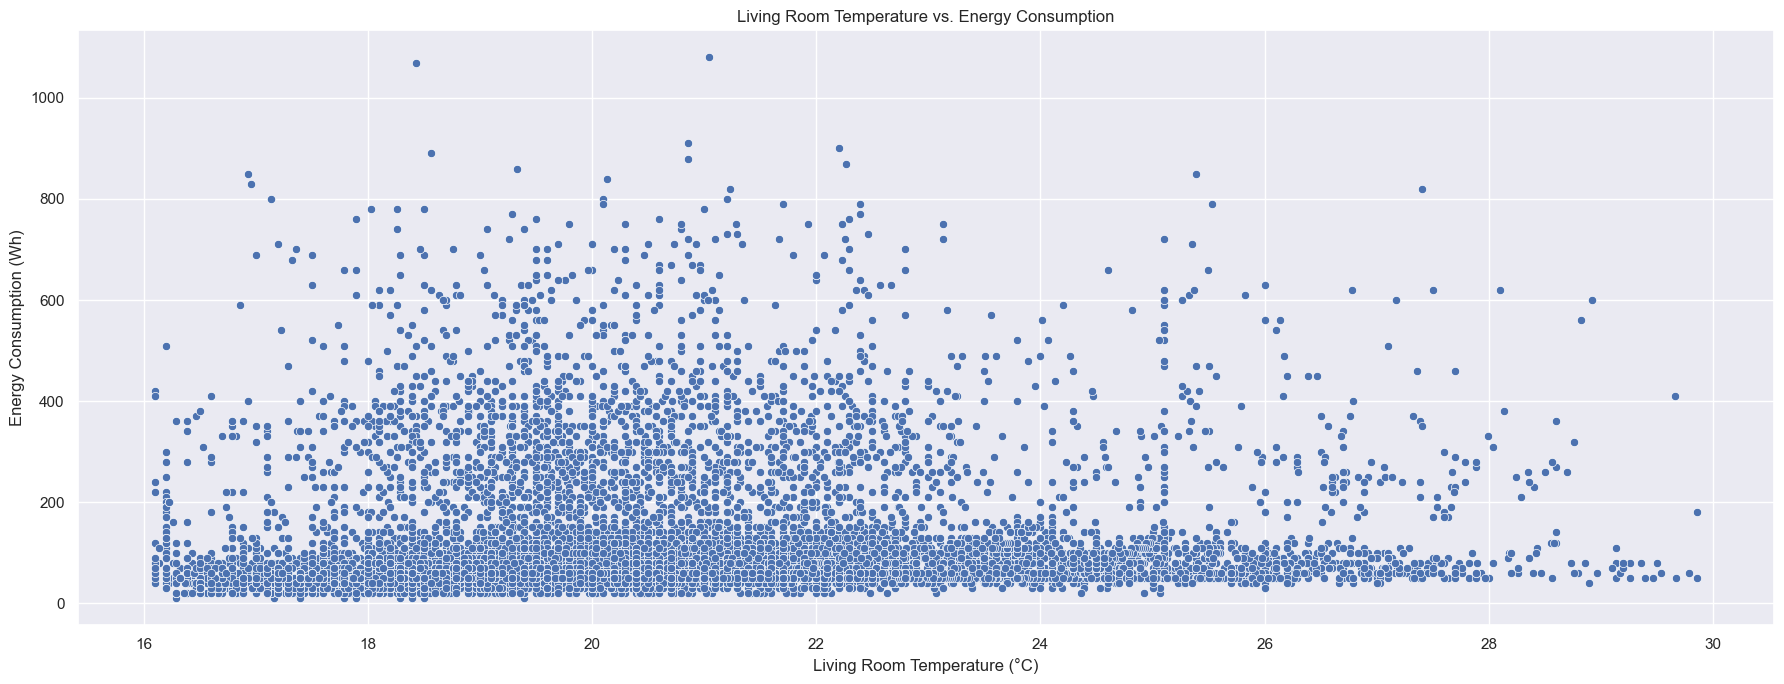

In [50]:
plt.figure(figsize=(18, 7))

sns.scatterplot(x='T2', y='Appliances', data=df)
plt.title('Living Room Temperature vs. Energy Consumption')
plt.xlabel('Living Room Temperature (°C)')
plt.ylabel('Energy Consumption (Wh)')
plt.tight_layout()
plt.show()

## Insights

1. Energy Usage Patterns: Households tend to use more energy for appliances when the living room temperature is lower. This could be due to increased usage of heating appliances (e.g., heaters, radiators) to maintain a comfortable temperature in cooler conditions.
2. Efficiency Considerations: When the living room temperature is higher, there seems to be lower energy usage, which could indicate more efficient energy usage or reduced reliance on heating appliances in warmer conditions.

## Indoor Humidity vs. Energy Consumption

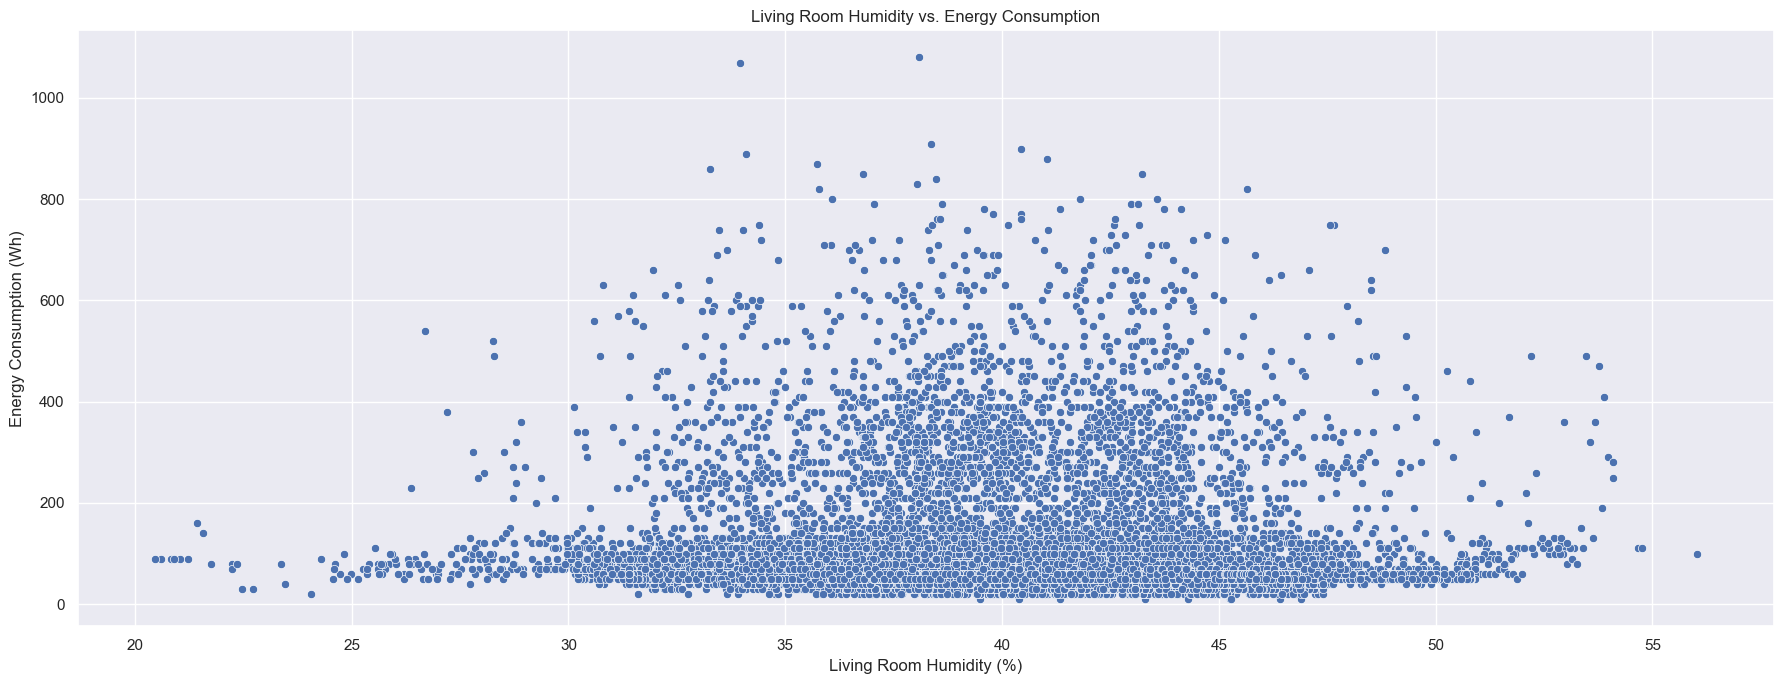

In [49]:
plt.figure(figsize=(18, 7))

sns.scatterplot(x='RH_2', y='Appliances', data=df)
plt.title('Living Room Humidity vs. Energy Consumption')
plt.xlabel('Living Room Humidity (%)')
plt.ylabel('Energy Consumption (Wh)')

plt.tight_layout()
plt.show()

## Insights

1. Consistent Energy Usage: There appears to be a consistent and relatively high usage of energy within a specific range of living room humidity, particularly between 35% and 45% humidity levels.
2. 

## Visualize temperature distribution

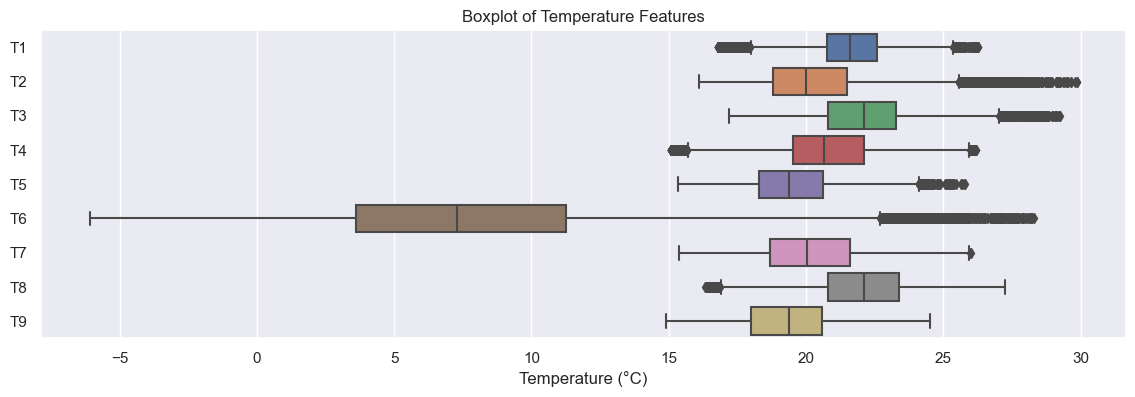

In [36]:
# Visualizing Temperature and Humidity Features
temperature_columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']

plt.figure(figsize=(14, 4))
sns.boxplot(data=df[temperature_columns], orient='h')
plt.title('Boxplot of Temperature Features')
plt.xlabel('Temperature (°C)')
plt.show()


## Insights

1. Range of Temperature: The boxplot shows the range of temperature values of the  room within  different times in the room, as indicated by the temperature features T1 to T9.

## Visualize humidity distribution

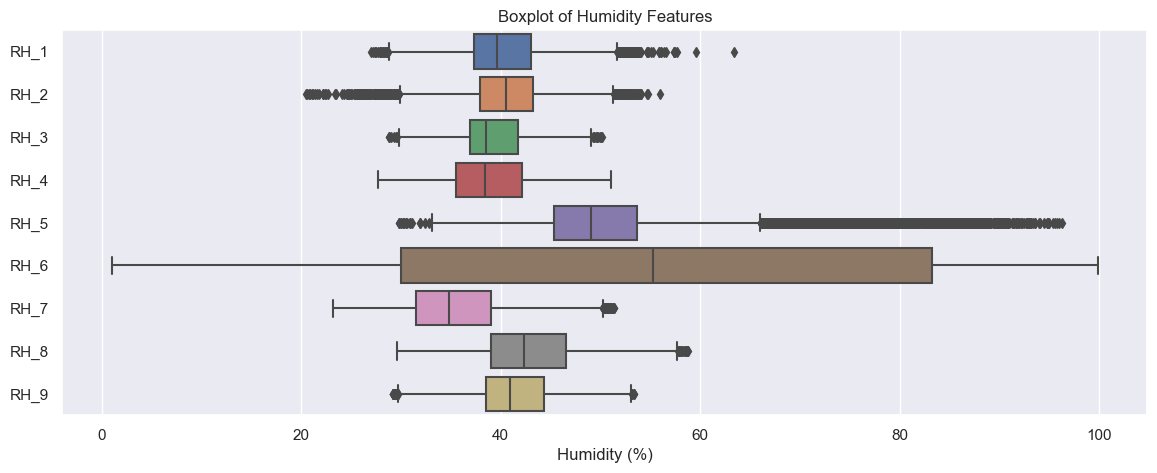

In [45]:

humidity_columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']

plt.figure(figsize=(14, 5))
sns.boxplot(data=df[humidity_columns], orient='h')
plt.title('Boxplot of Humidity Features')
plt.xlabel('Humidity (%)')
plt.show()




## Extracting date and time features from 'date'

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek


### Time-of-Day Analysis

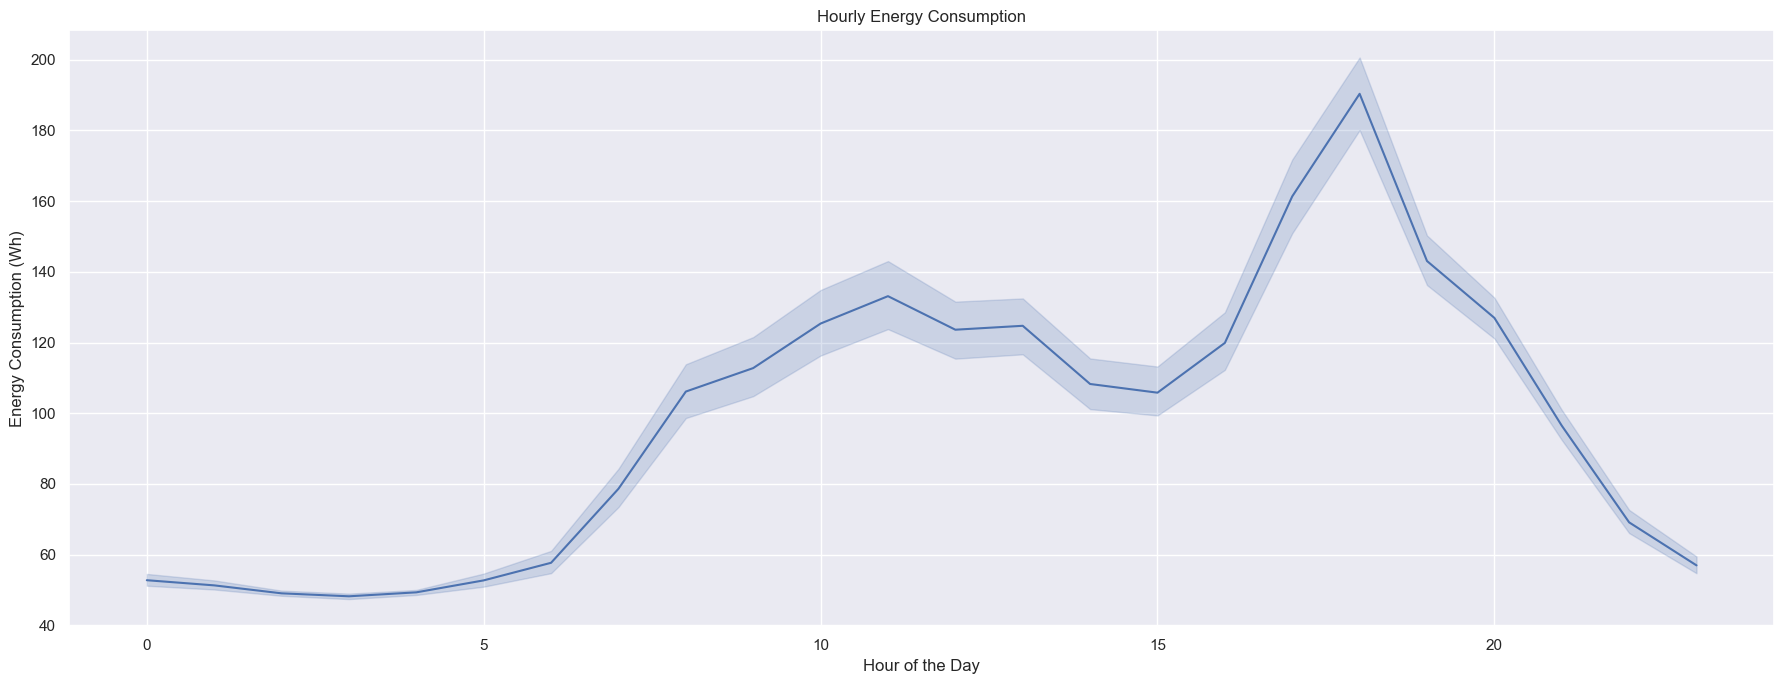

In [10]:

plt.figure(figsize=(18, 7))

sns.lineplot(x='hour', y='Appliances', data=df)
plt.title('Hourly Energy Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (Wh)')
plt.tight_layout()
plt.show()


### Insight


1. The line plot shows the variation in energy consumption throughout the day.
2. Peaks in energy usage may correspond to times of high occupancy or specific activities, such as meal preparation or evening entertainment.

### Average Energy Consumption (Wh)

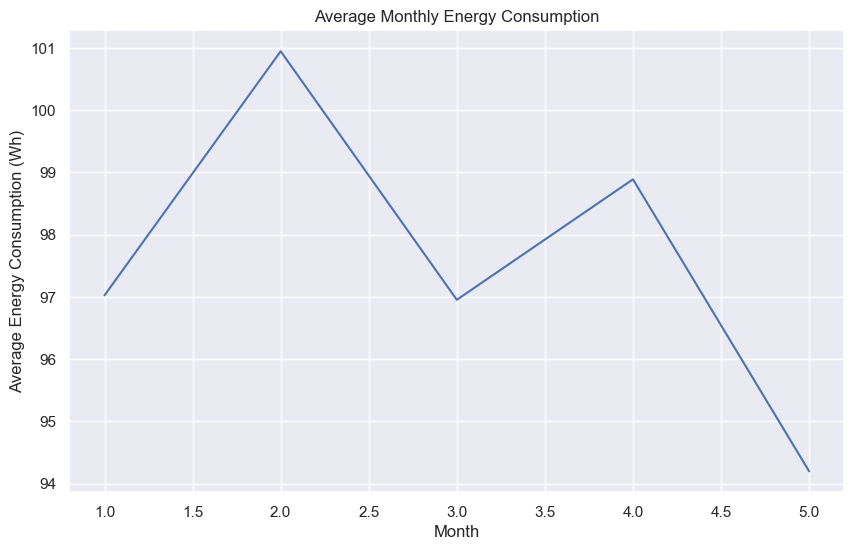

In [11]:

monthly_energy = df.groupby('month')['Appliances'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Appliances', data=monthly_energy)
plt.title('Average Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption (Wh)')
plt.show()

This analysis clearly shows  seasonal trends between different months of the year with the second and 4th month showing high energy usage


In [12]:
df.month.unique()

array([1, 2, 3, 4, 5])

In [82]:
data_updated = df.copy()

# Let's create some additional features
data_updated['Total_Temperature'] = data_updated[['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']].mean(axis=1)
data_updated['Total_Humidity'] = data_updated[['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']].mean(axis=1)


In [83]:
# Drop unnecessary columns
data_updated = data_updated.copy()
data_updated.drop(['date', 'rv1', 'rv2', 'day_of_week','Visibility','Press_mm_hg','RH_6','Windspeed','hour','RH_5','RH_out','RH_8',
          'RH_9','T8','T7','RH_3','RH_2','RH_4','RH_7','RH_1','lights','Total_Humidity'], axis=1, inplace=True)

## Correlation heatmap

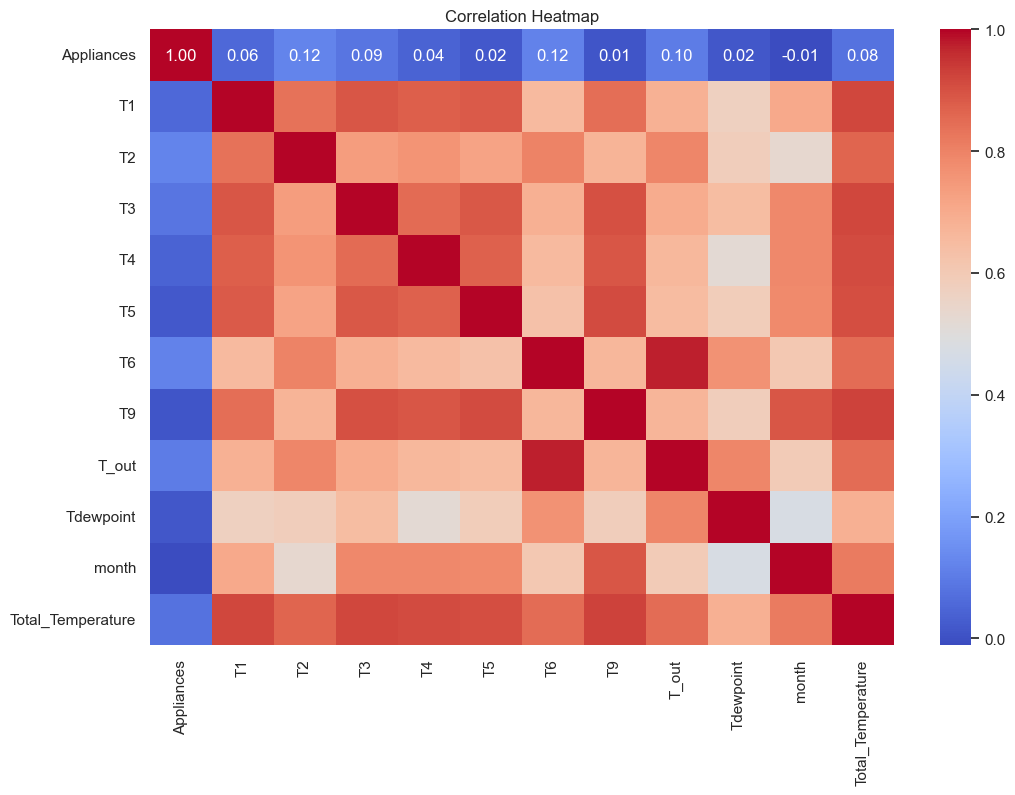

In [85]:

plt.figure(figsize=(12, 8))
sns.heatmap(data_updated.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [87]:
data_updated.to_csv('Ready_df3.csv', index=False)


# Prescriptive Analysis

1. Seasonal analysis reveals fluctuations in energy consumption throughout the year, with peak demand periods corresponding to certain seasons or weather conditions. By leveraging seasonal adjustments, such as adjusting thermostat settings or scheduling appliance usage during off-peak hours, households can optimize energy usage and reduce costs.
2. The analysis demonstrates the significant impact of outdoor temperature and humidity on energy consumption. To mitigate these effects, residents can adopt strategies such as weatherproofing homes, using energy-efficient appliances, and implementing smart climate control systems.
3. Promoting energy-saving behaviors among residents is essential for fostering a culture of sustainability. By providing education and incentives to encourage energy-saving habits, such as turning off lights when not in use, unplugging electronics, and using energy-efficient appliances, households can contribute to reducing overall energy consumption and environmental impact.
4. Integrating weather data into energy management strategies allows for dynamic adjustments based on weather conditions. By leveraging weather forecasts to anticipate temperature fluctuations and humidity levels, households can proactively adjust thermostat settings and implement energy-saving measures to optimize energy usage and minimize environmental impact.
5. Policy and regulatory frameworks play a crucial role in supporting energy efficiency initiatives. Governments can incentivize energy-saving technologies, implement building codes and standards to promote energy-efficient construction practices, and establish energy efficiency targets and regulations to drive adoption. By aligning policy initiatives with sustainability goals, policymakers can create an enabling environment for advancing energy efficiency and reducing greenhouse gas emissions.